<a href="https://colab.research.google.com/github/thisisSHAX/ML_Ops_Project-/blob/main/Model_Scorecard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
num_features = list(set(x_columns) - set(cat_features))

In [4]:
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)
encoded_df.sample(5)

,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
37,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
522,24,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
896,36,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
698,34,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
107,24,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
x_features = list(encoded_df.columns)

In [6]:
X = encoded_df
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)
#Checking imbalance
Y.sum()/len(Y)

Yes    0.690702
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)
train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

# Splitting after One - Hot Encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter= 10000)

# fit the model with data
logreg.fit(X_train,Y_train)

#
Y_pred_final=logreg.predict(X_prod)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 257.44, 'Predicted label')

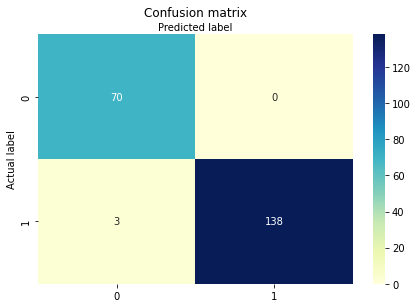

In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_prod, Y_pred_final)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
print("Accuracy:",metrics.accuracy_score(Y_prod, Y_pred_final))
print("Precision:",metrics.precision_score(Y_prod, Y_pred_final))
print("Recall:",metrics.recall_score(Y_prod, Y_pred_final))
print("f1 score:",metrics.f1_score(Y_prod, Y_pred_final))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.985781990521327
Precision: 1.0
Recall: 0.9787234042553191
f1 score: 0.989247311827957
Specificity 1.0


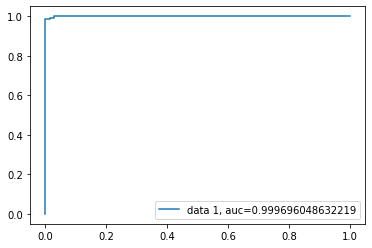

In [11]:
Y_pred_proba_final = logreg.predict_proba(X_prod)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_prod,  Y_pred_proba_final)
auc = metrics.roc_auc_score(Y_prod, Y_pred_proba_final)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.3.0)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer1 = OneHotEncoder(drop='first', sparse=False)
categorical_transformer2 = TargetEncoder()

In [15]:
preprocessor1 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer1, cat_features)])
preprocessor2 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer2, cat_features)])

In [16]:
#train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

#train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [17]:
clf1 = Pipeline(steps=[("preprocessor", preprocessor1),("classifier", LogisticRegression(random_state=100))])
clf1.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

In [18]:
clf2 = Pipeline(steps=[("preprocessor", preprocessor2),("classifier", LogisticRegression(random_state=100))])
clf2.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat', TargetEncoder(),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

## Model Scorecard

In [19]:
!pip install --upgrade pip==20.2
!pip install -U seaborn scikit-learn model-card-toolkit

Requirement already up-to-date: pip==20.2 in /usr/local/lib/python3.7/dist-packages (20.2)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.2)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (1.0.1)
Requirement already up-to-date: model-card-toolkit in /usr/local/lib/python3.7/dist-packages (1.1.0)
     |████████████████████████████████| 62 kB 892 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

google-colab 1.0.0 requires ipython~=5.5.0, but you'll have ipython 7.29.0 which is incompatible.
google-col

In [20]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

### Create Plot


In [21]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

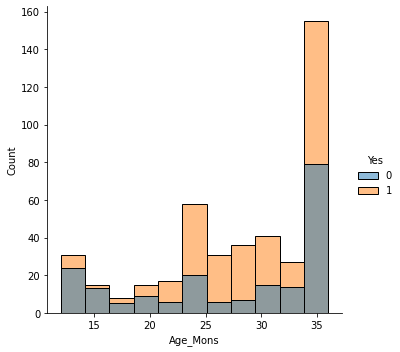

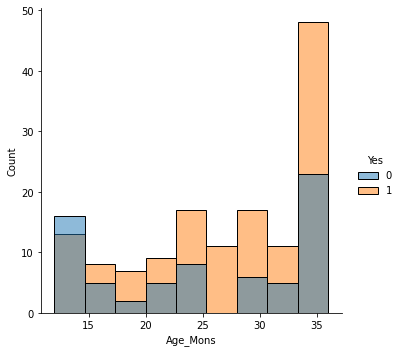

In [22]:
# Plot the age in months for both the train and test sets

Y_train_s = Y_train.squeeze()
Y_prod_s = Y_prod.squeeze()

sns.displot(x=X_train['Age_Mons'], hue=Y_train_s)
Age_mon_train = plot_to_str()

sns.displot(x=X_prod['Age_Mons'], hue=Y_prod_s)
Age_mon_test = plot_to_str()

### Create Model Card

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


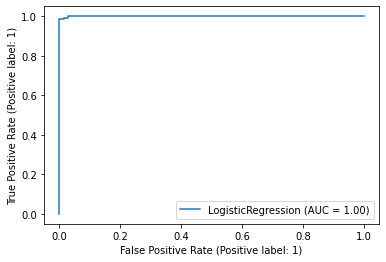

In [23]:
# Plot a ROC curve


plot_roc_curve(logreg, X_prod, Y_prod)
roc_curve_lr = plot_to_str()

#plot_roc_curve(dtfit, X_test, Y_test)
#roc_curve_dt = plot_to_str()

#plot_roc_curve(knnfit, X_test, Y_test)
#roc_curve_knn = plot_to_str()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


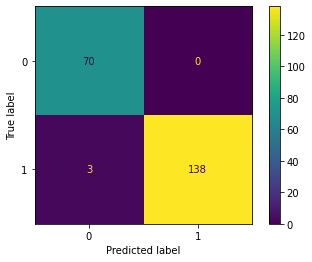

In [24]:
# Plot a confusion matrix

plot_confusion_matrix(logreg, X_prod, Y_prod)
confusion_matrix_lr = plot_to_str()

#plot_confusion_matrix(dtfit, X_test, Y_test)
#confusion_matrix_dt = plot_to_str()

#plot_confusion_matrix(knnfit, X_test, Y_test)
#confusion_matrix_knn = plot_to_str()

### Model Card for Logistic regression

In [25]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate model details into model card

In [26]:
model_card.model_details.name = 'Autism Screening Dataset'
model_card.model_details.overview = (
    'This model predicts whether a child is autistic or not based certain factors')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.version.name = str("Version 1.0")
model_card.model_details.version.date = str(date.today())

### Add model uses and user details, ethical considerations and limitations

In [27]:
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Autism diagnosis')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Autism diagnosis')]
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')]

### Add training and test dataset details

In [28]:
model_card.model_parameters.data.append(mctlib.Dataset(name="Training Dataset"))
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection =[
    mctlib.Graphic(image=Age_mon_train)
]
model_card.model_parameters.data.append(mctlib.Dataset(name="Production Dataset"))
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_prod)} rows with {len(X_prod.columns)} features')
model_card.model_parameters.data[1].graphics.collection =[
    mctlib.Graphic(image=Age_mon_test)
]

### Add Model Evaluation Details


In [29]:
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix for Logistic Regression')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve_lr),
    mctlib.Graphic(image=confusion_matrix_lr),
]

In [30]:
mct.update_model_card(model_card)

### Generate Model Card for Logistic Regression




In [31]:
# Return the model card document as an HTML page

html = mct.export_format(output_file='/mnt/demo_cardv5.html')

In [32]:
display.display(display.HTML(html))